In [1]:
from dotenv import load_dotenv

load_dotenv()
# OR, the same with increased verbosity
load_dotenv(verbose=True)
# OR, explicitly providing path to '.env'
from pathlib import Path  # Python 3.6+ only
env_path = Path('.') / '.env'
load_dotenv(dotenv_path=env_path)

True

In [2]:
from util.dataset import create_flowers_ds
from util.pretext import rotate, make_puzzle
from util.utils import show_image, prediction_round, save_image, predict_batch_with_probs, decode_label
from tensorflow.python.ops.numpy_ops import np_config
import tensorflow as tf
from util.adversarial import create_adv_pattern_batch, create_adversarial_image_batch

np_config.enable_numpy_behavior()

In [68]:
ds = create_flowers_ds()

Creating dataset TF Flowers
Loading dataset: tf_flowers
Found 3840 datapoints belonging to 5 classes:
['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']
 Using 2816 for training, 768 for validation, and reserved 256 for testing


2022-03-25 14:37:25.500267: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


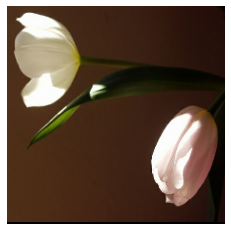

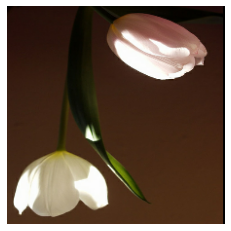

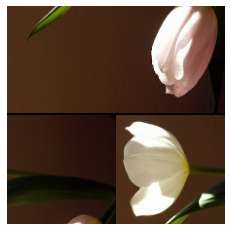

In [8]:
batch = [x for x,y in ds.train.take(1)][0]

img = batch[0]

show_image(img)

rotated_img = rotate(x=img, y=0, k=1)[0]
show_image(rotated_img)

puzzle = make_puzzle(x=batch, y=0, perm=[1, 2, 3, 0], perm_label=9)[0]
show_image(puzzle[0])

In [4]:
NN = tf.keras.models.load_model('models/eff_net_pre_trained')
x, y = prediction_round(ds, NN)

159 out of 256 have been correctly classified


Label = tulips, Probability = 0.4046068489551544


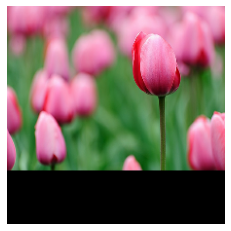

In [70]:
index = 5
save_image(x[index], 'images/og_image.png')
res = predict_batch_with_probs(x[:10], NN)
print(f'Label = {decode_label(ds, res[0][index])}, Probability = {res[1][index]}')

Label = tulips, Probability = 0.4046096205711365


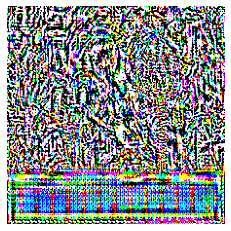

In [71]:
adv_pattern = create_adv_pattern_batch(x[:10], y[:10], NN)
adv_pattern_res = predict_batch_with_probs(adv_pattern, NN)
print(f'Label = {decode_label(ds, adv_pattern_res[0][index])}, Probability = {adv_pattern_res[1][index]}')
save_image(adv_pattern[index], 'images/adv_pattern.png')

eps = 0.01
Label = roses, Probability = 0.4045904278755188


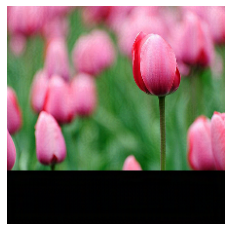

In [72]:
print('eps = 0.01')
adv_image = create_adversarial_image_batch(x[:10], y[:10], NN, 0.01)
adv_attack_res = predict_batch_with_probs(adv_image, NN)
print(f'Label = {decode_label(ds, adv_attack_res[0][index])}, Probability = {adv_attack_res[1][index]}')
save_image(adv_image[index], 'images/adv_attack_001.png')

eps = 0.1
Label = roses, Probability = 0.4046095609664917


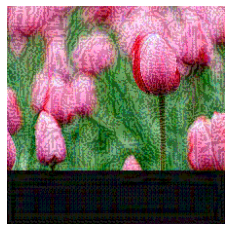

In [73]:
print('eps = 0.1')
adv_image = create_adversarial_image_batch(x[:10], y[:10], NN, 0.1)
adv_attack_res = predict_batch_with_probs(adv_image, NN)
print(f'Label = {decode_label(ds, adv_attack_res[0][index])}, Probability = {adv_attack_res[1][index]}')
save_image(adv_image[index], 'images/adv_attack_01.png')

eps = 0.15
Label = roses, Probability = 0.4046012759208679


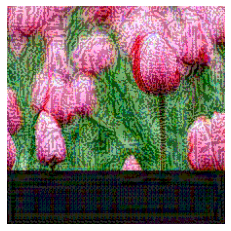

In [74]:
print('eps = 0.15')
adv_image = create_adversarial_image_batch(x[:10], y[:10], NN, 0.15)
adv_attack_res = predict_batch_with_probs(adv_image, NN)
print(f'Label = {decode_label(ds, adv_attack_res[0][index])}, Probability = {adv_attack_res[1][index]}')
save_image(adv_image[index], 'images/adv_attack_015.png')